<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_ML_Spark_Modelo_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Spark: Modelo de Classificação (Churn)</b></font>

<a href="https://colab.research.google.com/drive/18KSOLPKeyxYDKTTvKE-cZzV_crzY0Cip?authuser=1#scrollTo=9dojAInAafLe&uniqifier=6"><font size=2; color=gray>Arquivo Colab</a></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href="https://cursos.alura.com.br/course/spark-modelos-classificacao"><font size=2 color=gray>Spark: Modelo de Classificação (Churn)</a>
<li>Carga Horária: 10 h
<li>Instrutora: Igor nascimento Alves
<li>Data de Início: 01-2023
</ul>




Durante o curso foi visto a estrutura de um projeto de ML para o de Churn, utilizando o framework do Spark para permitir grande capacidade computacional na análise. Este é problema pode ser transformado em um problema de classificação, através da análise das características dos usuários.

Este é um problema comum na área que lida com a satisfação do cliente. 

O Spark exige um processo específico para a construção de modelos. Então foram estudados como estruturar o ambiente para processar dados com o Spark, alguns tratamentos necessários, a exploração dos dados, a modelagem de modelos de Regressão Logística, Árvore de Decisão e *Random Forest*, para o problema de classificação; Técnicas de validação dos modelos e comparação para encontrar o melhor modelo para o problema.

## <font color=orange><b>Conteúdo</b></font>

* SparkSQL
    * Carregar os dados com `SparkSQL`;
    * Manipular e tratar os dados utilizando a função `select` e `groupBy`;
    * Identificar dados categóricos para determinar o tratamento adequado;
    * Utilizar as `Functions` do PySpark SQL para efetivamente manipular o DataFrame;
    * Tratar os dados categóricos utilizando os dummies.
* Spark Machine Learning (MLLib)
    * Transformar os dados com `VectorAssembler`;
    * Como funciona a regressão logística;
    * Como funciona a árvore de decisão;
    * Como funciona o Random Forest Classifier;
    * Criar e treinar um modelo de regressão logística, árvore de decisão e Random Forest Classifier
* Validação
    * Medir o desempenho do modelo criado com métricas e matriz de confusão.
    * Medir o desempenho do modelo utilizando o `MulticlassClassificationEvaluator`.
* Tunning
    * Otimizar os hiperparâmetros utilizando `ParamGridBuilder`;
    * Testar diversos modelos utilizando o `CrossValidator`;
* Comparação de modelos
    * Comparar o desempenho dos modelos utilizando o `MulticlassClassificationEvaluator`;
    * Criar o modelo final e testar com um novo cliente.

## <font color=orange><b>Resumo da Metodologia</b></font>

<font color=orange></font>

0. <font color=orange>Problema</font>
    * Entendimento do problema

1. <font color=orange>Ambiente e Dados</font>
    1. Construção do ambiente de desenvolvimento
    2. Carga dos dados

2. <font color=orange>Transformações</font>
    * Tradução das classes
        1. Lista equivalente ao SELECT
            * `CASE WHEN ... THEN ... ELSE ... END`
        2. Seleção dos dados através da lista de strings 

3. <font color=orange>Exploração</font>
    * Verificação o Balanceamento dos dados (variável alvo)
    * Verificação das classes em cada variável

4. <font color=orange>Transformações (pré-processamento)</font>
    * Encoding Dummies
    * Nome da variável alvo
    * Estrutura de conjunto de vetores
    * Separação dos dados de Treino e Teste

5. <font color=orange>Modelagem</font>
    * Regressão Logística
    * Árvore de Decisão
    * Random Forest

6. <font color=orange>Tunning</font>
    * Hiperparâmetros
    * Validação Cruzada

6. <font color=orange>Validação</font>
    * Métricas de classificação
    * Matriz de Confusão
        * Tipos de erros

7. <font color=orange>Comparação dos Modelos</font>

8. <font color=orange>Aplicação do Modelo Final</font>

# <font color=orange><b>0. PROBLEMA</b></font>



O problema de *Churn* é quando os clientes começam a desistir do serviço e cancelam o consumo dele. Isso é um problema que impacta diretamente o faturamento da empresa, pois além perder clientes, perde-se a recomendação para novos clientes. Uma estratégia para evitar o cancelamento é a provisão de descontos ou prêmios, que atraiam a atenção do cliente.

Para identificar os clientes que possuem grande probabilidade de cancelamento, um modelo de Machine Learning pode classificá-los, indicando quais deverão receber os descontos.

# <font color=orange><b>1. DADOS & AMBIENTE</b></font>


## <font color=orange><b>1.1 Ambiente de Desenvolvimento</b></font>


### <font color=orange><b>a. PySpark</b></font>

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o *shell* PySpark para analisar interativamente seus dados em um ambiente distribuído. O PySpark oferece suporte à maioria dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.

<center><img src="https://caelum-online-public.s3.amazonaws.com/2273-introducao-spark/01/img-001.png"/></center>

* **Spark SQL e DataFrame**

Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído.

* **Spark Streaming**

Executando em cima do Spark, o recurso de *streaming* no Apache Spark possibilita o uso de poderosas aplicações interativas e analíticas em *streaming* e dados históricos, enquanto herda a facilidade de uso do Spark e as características de tolerância a falhas.

* **Spark MLlib**

Construído sobre o Spark, MLlib é uma biblioteca de aprendizado de máquina escalonável que fornece um conjunto uniforme de APIs de alto nível que ajudam os usuários a criar e ajustar *pipelines* de aprendizado de máquina práticos.

* **Spark Core**

Spark Core é o mecanismo de execução geral subjacente para a plataforma Spark sobre o qual todas as outras funcionalidades são construídas. Ele fornece um RDD (*Resilient Distributed Dataset*) e recursos de computação na memória.

<font size=2>**Fonte:** [PySpark](https://spark.apache.org/docs/latest/api/python/index.html)</font>

https://spark.apache.org/docs/latest/api/python/

In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 14.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=38d134c74413ee075d768bd1f4fd2e5fab193d89bb198ddcc38192dc19b1a6fc
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


### <font color=orange><b>b. Spark Session</b></font>

O ponto de entrada para programar o Spark com a API Dataset e DataFrame.

Uma SparkSession pode ser utilizada para criar DataFrames, registrar DataFrames como tabelas, executar consultas SQL em tabelas, armazenar em cache e ler arquivos parquet. Para criar uma SparkSession, use o seguinte padrão de construtor:

<font size=2>**Fonte:** [SparkSession](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.SparkSession.html)</font>

* `local[*]`: rodar na máquina local
* `appName('Classificação com Spark')`: nome para identificar a Sessão
* `.getOrCreate()` criação da sessão

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master('local[*]').appName('Classificação com Spark').getOrCreate()
spark

## <font color=orange><b>1.2 Dados</b></font>


In [4]:
# Extração dos dados Web
url_dados = 'https://caelum-online-public.s3.amazonaws.com/2276-spark/01/base%20de%20dados.zip'

!wget $url_dados
!unzip '/content/base de dados.zip'

dados_path = '/content/base de dados/dados_clientes.csv'

--2023-01-17 23:47:50--  https://caelum-online-public.s3.amazonaws.com/2276-spark/01/base%20de%20dados.zip
Resolving caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)... 54.231.162.177, 52.216.40.81, 52.216.239.27, ...
Connecting to caelum-online-public.s3.amazonaws.com (caelum-online-public.s3.amazonaws.com)|54.231.162.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169730 (166K) [application/octet-stream]
Saving to: ‘base de dados.zip’

base de dados.zip   100%[===================>] 165.75K  --.-KB/s    in 0.08s   

2023-01-17 23:47:50 (1.97 MB/s) - ‘base de dados.zip’ saved [169730/169730]

Archive:  /content/base de dados.zip
  inflating: base de dados/dados_clientes.csv  


In [5]:
# Carregando dados CSV
#     inferSchema=True - inferência da estrutura da tabela

dados = spark.read.csv(path=dados_path, sep=',', header=True, inferSchema=True)

In [6]:
# Estrutura dos dados
dados

DataFrame[id: int, Churn: string, Mais65anos: int, Conjuge: string, Dependentes: string, MesesDeContrato: int, TelefoneFixo: string, MaisDeUmaLinhaTelefonica: string, Internet: string, SegurancaOnline: string, BackupOnline: string, SeguroDispositivo: string, SuporteTecnico: string, TVaCabo: string, StreamingFilmes: string, TipoContrato: string, ContaCorreio: string, MetodoPagamento: string, MesesCobrados: double]

In [7]:
# Exposição do dados
dados.show()

+---+-----+----------+-------+-----------+---------------+------------+------------------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+------------+------------+----------------+-------------+
| id|Churn|Mais65anos|Conjuge|Dependentes|MesesDeContrato|TelefoneFixo|MaisDeUmaLinhaTelefonica|   Internet|   SegurancaOnline|      BackupOnline| SeguroDispositivo|    SuporteTecnico|           TVaCabo|   StreamingFilmes|TipoContrato|ContaCorreio| MetodoPagamento|MesesCobrados|
+---+-----+----------+-------+-----------+---------------+------------+------------------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+------------+------------+----------------+-------------+
|  0|  Nao|         0|    Sim|        Nao|              1|         Nao|    SemServicoTelefonico|        DSL|               Nao|               Sim|              

In [8]:
# Número de Registros
dados.count()

10348

In [9]:
# Tipos de dados
dados.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Churn: string (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- Conjuge: string (nullable = true)
 |-- Dependentes: string (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- TelefoneFixo: string (nullable = true)
 |-- MaisDeUmaLinhaTelefonica: string (nullable = true)
 |-- Internet: string (nullable = true)
 |-- SegurancaOnline: string (nullable = true)
 |-- BackupOnline: string (nullable = true)
 |-- SeguroDispositivo: string (nullable = true)
 |-- SuporteTecnico: string (nullable = true)
 |-- TVaCabo: string (nullable = true)
 |-- StreamingFilmes: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- ContaCorreio: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)



Identificar o tipo de dado que temos

Analisando o tipo dos dados de cada coluna e também quais e quantas categorias temos para cada feature, poderemos classificá-las e, assim, decidir a melhor abordagem para o preparo dos dados para os modelos de machine learning.

Aplicar o melhor tratamento para cada tipo de dado

Nos dados identificados como categóricos binários, precisamos transformá-los para valores de 1 e 0, garantindo o entendimento do modelo. No restante dos dados categóricos é necessário criar dummies, para garantir que vamos representar as informações sem modificar os valores originais delas.

# <font color=orange><b>Etapa 2 - TRATAMENTOS</b></font>


<font size=2>**Fonte:** [Functions](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html#functions)</font>

## <font color=orange><b>2.1. Codificação (tradução)</b></font>


1. Conversão de dados (codificação) [1.2]
    * Transformar os dados categóricos de `sim` e `não` para `0` e `1`.

In [10]:
from pyspark.sql import functions as f

In [11]:
# Identificação das colunas binárias
colunasBinarias = [
    'Churn',
    'Conjuge',
    'Dependentes',
    'TelefoneFixo',
    'MaisDeUmaLinhaTelefonica',
    'SegurancaOnline',
    'BackupOnline',
    'SeguroDispositivo',
    'SuporteTecnico',
    'TVaCabo',
    'StreamingFilmes',
    'ContaCorreio'
]

In [12]:
# Criação da regra SQL de codificação
todasColunas = [f.when(f.col(c)=='Sim', 1).otherwise(0).alias(c) for c in colunasBinarias]
todasColunas

[Column<'CASE WHEN (Churn = Sim) THEN 1 ELSE 0 END AS Churn'>,
 Column<'CASE WHEN (Conjuge = Sim) THEN 1 ELSE 0 END AS Conjuge'>,
 Column<'CASE WHEN (Dependentes = Sim) THEN 1 ELSE 0 END AS Dependentes'>,
 Column<'CASE WHEN (TelefoneFixo = Sim) THEN 1 ELSE 0 END AS TelefoneFixo'>,
 Column<'CASE WHEN (MaisDeUmaLinhaTelefonica = Sim) THEN 1 ELSE 0 END AS MaisDeUmaLinhaTelefonica'>,
 Column<'CASE WHEN (SegurancaOnline = Sim) THEN 1 ELSE 0 END AS SegurancaOnline'>,
 Column<'CASE WHEN (BackupOnline = Sim) THEN 1 ELSE 0 END AS BackupOnline'>,
 Column<'CASE WHEN (SeguroDispositivo = Sim) THEN 1 ELSE 0 END AS SeguroDispositivo'>,
 Column<'CASE WHEN (SuporteTecnico = Sim) THEN 1 ELSE 0 END AS SuporteTecnico'>,
 Column<'CASE WHEN (TVaCabo = Sim) THEN 1 ELSE 0 END AS TVaCabo'>,
 Column<'CASE WHEN (StreamingFilmes = Sim) THEN 1 ELSE 0 END AS StreamingFilmes'>,
 Column<'CASE WHEN (ContaCorreio = Sim) THEN 1 ELSE 0 END AS ContaCorreio'>]

In [13]:
# Adicição dos dados não binários
for coluna in reversed(dados.columns):
    if coluna not in colunasBinarias:
        todasColunas.insert(0, coluna)

todasColunas

['id',
 'Mais65anos',
 'MesesDeContrato',
 'Internet',
 'TipoContrato',
 'MetodoPagamento',
 'MesesCobrados',
 Column<'CASE WHEN (Churn = Sim) THEN 1 ELSE 0 END AS Churn'>,
 Column<'CASE WHEN (Conjuge = Sim) THEN 1 ELSE 0 END AS Conjuge'>,
 Column<'CASE WHEN (Dependentes = Sim) THEN 1 ELSE 0 END AS Dependentes'>,
 Column<'CASE WHEN (TelefoneFixo = Sim) THEN 1 ELSE 0 END AS TelefoneFixo'>,
 Column<'CASE WHEN (MaisDeUmaLinhaTelefonica = Sim) THEN 1 ELSE 0 END AS MaisDeUmaLinhaTelefonica'>,
 Column<'CASE WHEN (SegurancaOnline = Sim) THEN 1 ELSE 0 END AS SegurancaOnline'>,
 Column<'CASE WHEN (BackupOnline = Sim) THEN 1 ELSE 0 END AS BackupOnline'>,
 Column<'CASE WHEN (SeguroDispositivo = Sim) THEN 1 ELSE 0 END AS SeguroDispositivo'>,
 Column<'CASE WHEN (SuporteTecnico = Sim) THEN 1 ELSE 0 END AS SuporteTecnico'>,
 Column<'CASE WHEN (TVaCabo = Sim) THEN 1 ELSE 0 END AS TVaCabo'>,
 Column<'CASE WHEN (StreamingFilmes = Sim) THEN 1 ELSE 0 END AS StreamingFilmes'>,
 Column<'CASE WHEN (ContaCorr

In [14]:
# Transformação SQL
dados.select(todasColunas).show()

+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
| id|Mais65anos|MesesDeContrato|   Internet|TipoContrato| MetodoPagamento|MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|
+---+----------+---------------+-----------+------------+----------------+-------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+
|  0|         0|              1|        DSL| Mensalmente|BoletoEletronico|        29.85|    0|      1|          0|           0|                       0|              0|           1|                0|             0|      0|              0|      

In [15]:
dataset = dados.select(todasColunas)
dataset.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Mais65anos: integer (nullable = true)
 |-- MesesDeContrato: integer (nullable = true)
 |-- Internet: string (nullable = true)
 |-- TipoContrato: string (nullable = true)
 |-- MetodoPagamento: string (nullable = true)
 |-- MesesCobrados: double (nullable = true)
 |-- Churn: integer (nullable = false)
 |-- Conjuge: integer (nullable = false)
 |-- Dependentes: integer (nullable = false)
 |-- TelefoneFixo: integer (nullable = false)
 |-- MaisDeUmaLinhaTelefonica: integer (nullable = false)
 |-- SegurancaOnline: integer (nullable = false)
 |-- BackupOnline: integer (nullable = false)
 |-- SeguroDispositivo: integer (nullable = false)
 |-- SuporteTecnico: integer (nullable = false)
 |-- TVaCabo: integer (nullable = false)
 |-- StreamingFilmes: integer (nullable = false)
 |-- ContaCorreio: integer (nullable = false)



# <font color=orange><b>Etapa 3 - EXPLORAÇÃO</b></font>

## **Dados Balanceados**

A variável alvo é balanceada, pois existe o mesmo número de eventos da classe sim e da não.

In [16]:
# Balanceamento da var. Alvo
dados.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|  Sim| 5174|
|  Nao| 5174|
+-----+-----+



In [17]:
# Seleção de variável
dados.select('Churn')\
    .groupBy('Churn')\
    .count()\
    .show()

+-----+-----+
|Churn|count|
+-----+-----+
|  Sim| 5174|
|  Nao| 5174|
+-----+-----+



## **Classes das Variáveis**

É importante investigar as classes das variáveis categóricas, para identificar se são binárias ou multinominais, além disso se são nominais ou ordenadas. Isso impactará em qual estratégia de codificação deverá ser utilizada.

In [ ]:
for coluna in reversed(dados.columns):
  dados\
      .select(coluna)\
      .groupBy(coluna)\
      .count()\
      .show()

# <font color=orange><b>Etapa 4 - TRANSFORMAÇÕES</b></font>


## <font color=orange><b>4.1. Dummies</b></font>


Algumas variáveis não são binárias, ou seja, possuem mais de uma classe. Neste caso, elas não podem ser simplesmente traduzidas para 0 e 1.

Novas variáveis podem ser criadas para verificação da ocorrência de cada classe.

In [18]:
# Visualziação dos dados multiclasse
dados.select(['Internet', 'TipoContrato', 'MetodoPagamento']).show()

+-----------+------------+----------------+
|   Internet|TipoContrato| MetodoPagamento|
+-----------+------------+----------------+
|        DSL| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|          Boleto|
|        DSL| Mensalmente|          Boleto|
|        DSL|       UmAno|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica| Mensalmente|   CartaoCredito|
|        DSL| Mensalmente|          Boleto|
|FibraOptica| Mensalmente|BoletoEletronico|
|        DSL|       UmAno|   DebitoEmConta|
|        DSL| Mensalmente|          Boleto|
|        Nao|    DoisAnos|   CartaoCredito|
|FibraOptica|       UmAno|   CartaoCredito|
|FibraOptica| Mensalmente|   DebitoEmConta|
|FibraOptica| Mensalmente|BoletoEletronico|
|FibraOptica|    DoisAnos|   CartaoCredito|
|        Nao|       UmAno|          Boleto|
|FibraOptica|    DoisAnos|   DebitoEmConta|
|        DSL| Mensalmente|   CartaoCredito|
|FibraOptica| Mensalmente|Boleto

* `groupBy('id')`: permite acessar a função `pivot`, além disso, mantém a coluna ID para permitir o JOIN posterior.
* `pivot('Internet')` transforma cada classe em uma coluna
* `agg(f.lit(1))` preenche com 1 quando tiver a classe e NaN os demais
* `f.lit(1)).na` seleciona os valores nulos
* `na.fill(0)` preenche com 0 os valores nulos

In [19]:
# Exemplo do processo
dataset.groupBy('id').pivot('Internet').agg(f.lit(1)).na.fill(0).show()

+----+---+-----------+---+
|  id|DSL|FibraOptica|Nao|
+----+---+-----------+---+
|7982|  1|          0|  0|
|9465|  0|          1|  0|
|2122|  1|          0|  0|
|3997|  1|          0|  0|
|6654|  0|          1|  0|
|7880|  0|          1|  0|
|4519|  0|          1|  0|
|6466|  0|          1|  0|
| 496|  1|          0|  0|
|7833|  0|          1|  0|
|1591|  0|          0|  1|
|2866|  0|          1|  0|
|8592|  0|          1|  0|
|1829|  0|          1|  0|
| 463|  0|          1|  0|
|4900|  0|          1|  0|
|4818|  0|          1|  0|
|7554|  1|          0|  0|
|1342|  0|          0|  1|
|5300|  0|          1|  0|
+----+---+-----------+---+
only showing top 20 rows



In [20]:
# Processamento do transformação Dummies
Internet = dataset.groupBy('id').pivot('Internet').agg(f.lit(1)).na.fill(0)
TipoContrato = dataset.groupBy('id').pivot('TipoContrato').agg(f.lit(1)).na.fill(0)
MetodoPagamento = dataset.groupBy('id').pivot('MetodoPagamento').agg(f.lit(1)).na.fill(0)

In [21]:
dataset = dataset\
    .join(Internet, 'id', how='inner')\
    .join(TipoContrato, 'id', how='inner')\
    .join(MetodoPagamento, 'id', how='inner')\
    .select(
        '*',
        f.col('DSL').alias('Internet_DSL'), 
        f.col('FibraOptica').alias('Internet_FibraOptica'), 
        f.col('Nao').alias('Internet_Nao'), 
        f.col('Mensalmente').alias('TipoContrato_Mensalmente'), 
        f.col('UmAno').alias('TipoContrato_UmAno'), 
        f.col('DoisAnos').alias('TipoContrato_DoisAnos'), 
        f.col('DebitoEmConta').alias('MetodoPagamento_DebitoEmConta'), 
        f.col('CartaoCredito').alias('MetodoPagamento_CartaoCredito'), 
        f.col('BoletoEletronico').alias('MetodoPagamento_BoletoEletronico'), 
        f.col('Boleto').alias('MetodoPagamento_Boleto')        
    )\
    .drop(
        'Internet', 'TipoContrato', 'MetodoPagamento', 'DSL', 
        'FibraOptica', 'Nao', 'Mensalmente', 'UmAno', 'DoisAnos', 
        'DebitoEmConta', 'CartaoCredito', 'BoletoEletronico', 'Boleto'
    )

dataset.show()

+----+----------+---------------+-----------------+-----+-------+-----------+------------+------------------------+---------------+------------+-----------------+--------------+-------+---------------+------------+------------+--------------------+------------+------------------------+------------------+---------------------+-----------------------------+-----------------------------+--------------------------------+----------------------+
|  id|Mais65anos|MesesDeContrato|    MesesCobrados|Churn|Conjuge|Dependentes|TelefoneFixo|MaisDeUmaLinhaTelefonica|SegurancaOnline|BackupOnline|SeguroDispositivo|SuporteTecnico|TVaCabo|StreamingFilmes|ContaCorreio|Internet_DSL|Internet_FibraOptica|Internet_Nao|TipoContrato_Mensalmente|TipoContrato_UmAno|TipoContrato_DoisAnos|MetodoPagamento_DebitoEmConta|MetodoPagamento_CartaoCredito|MetodoPagamento_BoletoEletronico|MetodoPagamento_Boleto|
+----+----------+---------------+-----------------+-----+-------+-----------+------------+----------------------

# <font color=orange><b>Etapa 4 - MODELAGEM</b></font>


A regressão logística é um método popular para prever uma resposta categórica. É um caso especial de modelos Lineares Generalizados que prevê a probabilidade dos resultados. Em `spark.ml`, a regressão logística pode ser usada para prever um resultado binário usando regressão logística binomial ou pode ser usada para prever um resultado multiclasse usando regressão logística multinomial. Use o parâmetro `family` para selecionar entre esses dois algoritmos ou deixe-o indefinido e o Spark inferirá a variante correta.

<font size=2>**Fonte:** [MLlib](https://spark.apache.org/docs/latest/ml-classification-regression.html#logistic-regression)</font>

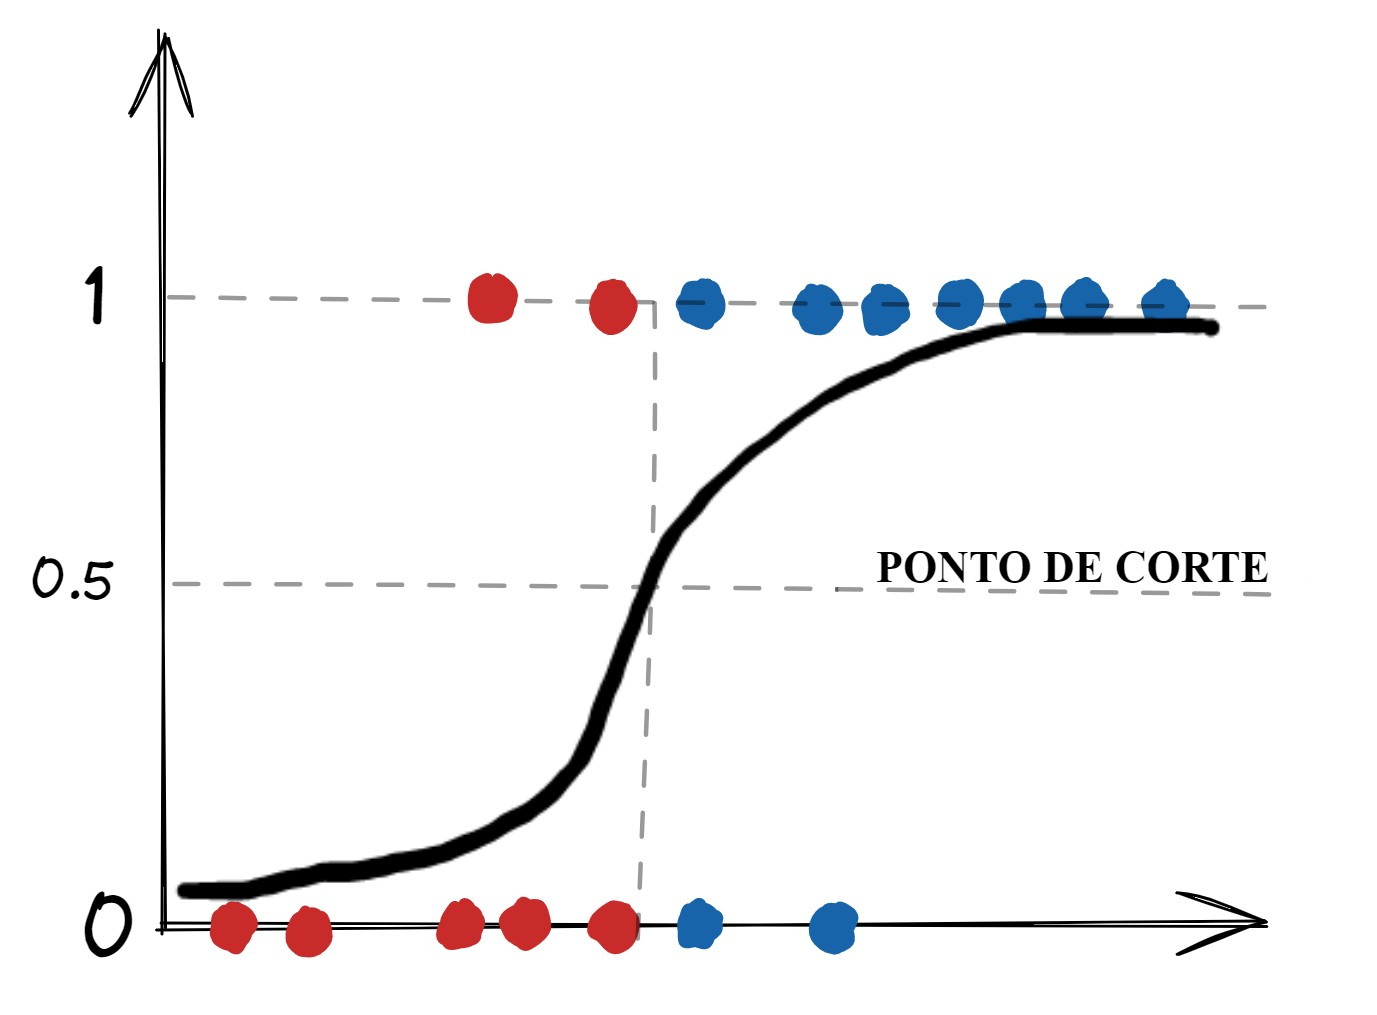

Na figura acima, os pontos em que y é igual a 1 representam os verdadeiros valores da classe 1. Os pontos em que y é igual a 0 representam os verdadeiros valores da classe 0. A curva em forma de S representa o modelo de regressão logística, que corresponde ao valor de probabilidade de cada um dos pontos.

 <img src="https://miro.medium.com/max/1400/0*1KnKYuv0UDu_1-qM.gif?width=1191&height=670" alt="Minha Figura">


## **2.1 Preparação dos Dados**

1. <font color=orange>VARIÁVEL ALVO</font>: ele espera que a variável alvo tenha um nome padrão: `label`
2. <font color=orange>VETOR DAS VARIÁVEIS EXPLICATIVAS</font>: O Spark para processsar os algorítmos de ML ele precisa receber um conjunto de **VETORES** ao invés de um DataFrameSpark.
    * Usar o transformadro `VectorAssembler`
3. <font color=orange>DADOS DE TREINO E TESTE</font>

### **2.1.1 Nome Variável Alvo**

In [22]:
# 1. Renomear coluna
dataset = dataset.withColumnRenamed('Churn', 'label')
dataset.columns

['id',
 'Mais65anos',
 'MesesDeContrato',
 'MesesCobrados',
 'label',
 'Conjuge',
 'Dependentes',
 'TelefoneFixo',
 'MaisDeUmaLinhaTelefonica',
 'SegurancaOnline',
 'BackupOnline',
 'SeguroDispositivo',
 'SuporteTecnico',
 'TVaCabo',
 'StreamingFilmes',
 'ContaCorreio',
 'Internet_DSL',
 'Internet_FibraOptica',
 'Internet_Nao',
 'TipoContrato_Mensalmente',
 'TipoContrato_UmAno',
 'TipoContrato_DoisAnos',
 'MetodoPagamento_DebitoEmConta',
 'MetodoPagamento_CartaoCredito',
 'MetodoPagamento_BoletoEletronico',
 'MetodoPagamento_Boleto']

### **2.1.2 Estrutura de Vetores**

In [23]:
# Especificação das variáveis explicativas
from pyspark.ml.feature import VectorAssembler

X = dataset.columns
X.remove('label')
X.remove('id')
X

['Mais65anos',
 'MesesDeContrato',
 'MesesCobrados',
 'Conjuge',
 'Dependentes',
 'TelefoneFixo',
 'MaisDeUmaLinhaTelefonica',
 'SegurancaOnline',
 'BackupOnline',
 'SeguroDispositivo',
 'SuporteTecnico',
 'TVaCabo',
 'StreamingFilmes',
 'ContaCorreio',
 'Internet_DSL',
 'Internet_FibraOptica',
 'Internet_Nao',
 'TipoContrato_Mensalmente',
 'TipoContrato_UmAno',
 'TipoContrato_DoisAnos',
 'MetodoPagamento_DebitoEmConta',
 'MetodoPagamento_CartaoCredito',
 'MetodoPagamento_BoletoEletronico',
 'MetodoPagamento_Boleto']

In [24]:
# Vetores do modelo Spark
assembler = VectorAssembler(inputCols=X, outputCol='features')

In [25]:
dataset_prep = assembler.transform(dataset).select('features', 'label')
dataset_prep.show(10, truncate=False)

+-----------------------------------------------------------------------------------------------------------+-----+
|features                                                                                                   |label|
+-----------------------------------------------------------------------------------------------------------+-----+
|(24,[1,2,11,12,13,14,17,22],[1.0,45.30540797610398,1.0,1.0,1.0,1.0,1.0,1.0])                               |1    |
|(24,[1,2,3,5,6,8,9,11,12,13,15,17,22],[60.0,103.6142230120257,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|1    |
|(24,[1,2,5,6,10,11,12,13,14,18,23],[12.0,75.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                       |0    |
|(24,[1,2,3,5,8,12,13,14,19,21],[69.0,61.45,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                               |0    |
|(24,[1,2,3,5,6,11,13,15,17,22],[7.0,86.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])                                 |1    |
|(24,[1,2,5,6,12,13,15,17,22],[14.0,85.03742670311915,1.0,1.0,1.0,1.0,1.

A estrutura de vetores do Spark não possui dados 0. Então ele cria uma estrutura não densa, sendo uma <font color=orange>matriz esparsa</font>, economizando memória.

* 1. Número de features (0-based)
* 2. Posição da feature
* 3. Valor da feature

### **2.1.3 Dados de Treino e Teste**

<font size=2>**Documentação:**</font>
<font size=2>[randomSplit](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.randomSplit.html)</font>

In [26]:
SEED = 101

In [27]:
# Separação de Treino e Test Random Split
treino, teste = dataset_prep.randomSplit(weights=[0.7, 0.3], seed=SEED)

In [28]:
treino.count()

7206

In [29]:
teste.count()

3142

## **2.2 Regressão Logística - Ajuste e Previsão**

<font size=2>**Documentação:**</font>
<font size=2>[LogisticRegression](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.LogisticRegression.html)</font>

In [30]:
# Treinamento do Modelo
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression()
modelo_lr = lr.fit(treino)

In [31]:
# Predição dos dados de teste
previsoes_lr_teste = modelo_lr.transform(teste)
previsoes_lr_teste.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[3.02174179751551...|[0.95354674000282...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[-0.0922192966076...|[0.47696150091605...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[0.18744121711361...|[0.54672358463156...|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[0.91716501260103...|[0.71446410549163...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[-0.1495904711610...|[0.46267196467801...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[-0.1680594619286...|[0.45808374494006...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[-1.4170949608173...|[0.19511740608882...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[0.14194260698794...|[0.53542619200881...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[0.67046644011599...|[0.66160759507905...|       0.0|
|(24,[0,1,2,3,4,

* `probability`: Os valores de probability são equivalentes aos valores da regressão depois de passados pela [função de ativação - função logística](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_log%C3%ADstica) que abrange valores entre 0 e 1.
* `rawPrediction` são os valores antes de passarem pela função de ativação.

## **2.3 Métricas**

<font size=2>**Documentação:**</font>
<font size=2>[LogisticRegressionTrainingSummary](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.LogisticRegressionTrainingSummary.html)</font>

### <font color=orange><b>a. Métricas de Classificação</b></font>

In [32]:
# Avaliação do treino
resumo_lr_treino = modelo_lr.summary
resumo_lr_treino.accuracy

0.7849014709963918

In [33]:
print("Acurácia: %f" % resumo_lr_treino.accuracy)
print("Precisão: %f" % resumo_lr_treino.precisionByLabel[1])
print("Recall: %f" % resumo_lr_treino.recallByLabel[1])
print("F1: %f" % resumo_lr_treino.fMeasureByLabel()[1])

Acurácia: 0.784901
Precisão: 0.770686
Recall: 0.812517
F1: 0.791049


### <font color=orange><b>b. Matriz de Confusão</b></font>

In [34]:
previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()

1256

In [35]:
# Falsos e Verdadeiros Positivosa e Negativos
tp = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
tn = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
fp = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
fn = previsoes_lr_teste.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()
print(tp, tn,fp, fn)

1256 1179 400 307


In [36]:
# Função de Contrução de Matriz de Confusão
def calcula_mostra_matriz_confusao(df_transform_modelo, normalize=False, percentage=True):
  tp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
  tn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
  fp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
  fn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()
  
  valorP = 1
  valorN = 1

  if normalize:
    valorP = tp + fn
    valorN = fp + tn
  
  if percentage and normalize:
    valorP = valorP / 100
    valorN = valorN / 100

  print(' '*20, 'Previsto')
  print(' '*15, 'Churn', ' '*5 ,'Não-Churn')
  print(' '*4, 'Churn', ' '*6, int(tp/valorP), ' '*7, int(fn/valorP))
  print('Real')
  print(' '*4, 'Não-Churn', ' '*2, int(fp/valorN), ' '*7, int(tn/valorN))

In [37]:
calcula_mostra_matriz_confusao(previsoes_lr_teste, normalize=False)

                     Previsto
                Churn       Não-Churn
     Churn        1256         307
Real
     Não-Churn    400         1179


### **Função de Avaliação**

In [40]:
%%writefile utils.py
from pyspark.sql import functions as f # importo a biblioteca functions

# crio a função que vai receber os dados para serem avaliados
def calcula_mostra_metricas(modelo_lr, df_transform_modelo, normalize=False, percentage=True):
# os passos para montagem da matriz de confusão são os mesmos da aula
  tp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
  tn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
  fp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
  fn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()

  valorP = 1
  valorN = 1

  if normalize:
    valorP = tp + fn
    valorN = fp + tn

  if percentage and normalize:
    valorP = valorP / 100
    valorN = valorN / 100

  # ‘s’ será minha string de retorno
  # ela vai coletar e montar minha matriz de confusão
  # e também os valores de acurácia, precisão, recall e F1-score
  s = ''

  # construção da minha string da matriz de confusão  
  s += ' '*20 + 'Previsto\n'
  s += ' '*15 +  'Churn' + ' '*5 + 'Não-Churn\n'
  s += ' '*4 + 'Churn' + ' '*6 +  str(int(tp/valorP)) + ' '*7 + str(int(fn/valorP)) + '\n'
  s += 'Real\n'
  s += ' '*4 + 'Não-Churn' + ' '*2 + str(int(fp/valorN)) +  ' '*7 + str(int(tn/valorN))  + '\n'
  s += '\n'

  # coleto o resumo das métricas com summary
  resumo_lr_treino = modelo_lr.summary

  # adiciono os valores de cada métrica a minha string de retorno
  s += f'Acurácia: {resumo_lr_treino.accuracy}\n'
  s += f'Precisão: {resumo_lr_treino.precisionByLabel[1]}\n'
  s += f'Recall: {resumo_lr_treino.recallByLabel[1]}\n'
  s += f'F1: {resumo_lr_treino.fMeasureByLabel()[1]}\n'

  return s

Writing utils.py


In [41]:
# Aplicação da Função de Avaliação
from utils import calcula_mostra_metricas

print(calcula_mostra_metricas(modelo_lr, previsoes_lr_teste, normalize=True))

                    Previsto
               Churn     Não-Churn
    Churn      80       19
Real
    Não-Churn  25       74

Acurácia: 0.7849014709963918
Precisão: 0.7706855791962175
Recall: 0.8125173082248685
F1: 0.7910488002156916



## **2.4 Árvore de Decisão - Classificação**


As árvores de decisão são métodos populares para tarefas de *machine learning* de classificação e regressão. As árvores de decisão são amplamente utilizadas por serem fáceis de interpretar, lidar com *features* categóricas e contínuas, podem ser aplicadas a problemas de classificação com múltiplas classes e não requerem padronização dos dados. Algoritmos de conjunto de árvores, como *Random Forest* e *Boosting*, estão entre os de melhor desempenho para tarefas de classificação e regressão.

<font size=2>**Fonte:** [MLlib](https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier)
| [Decision trees](https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-trees)</font>

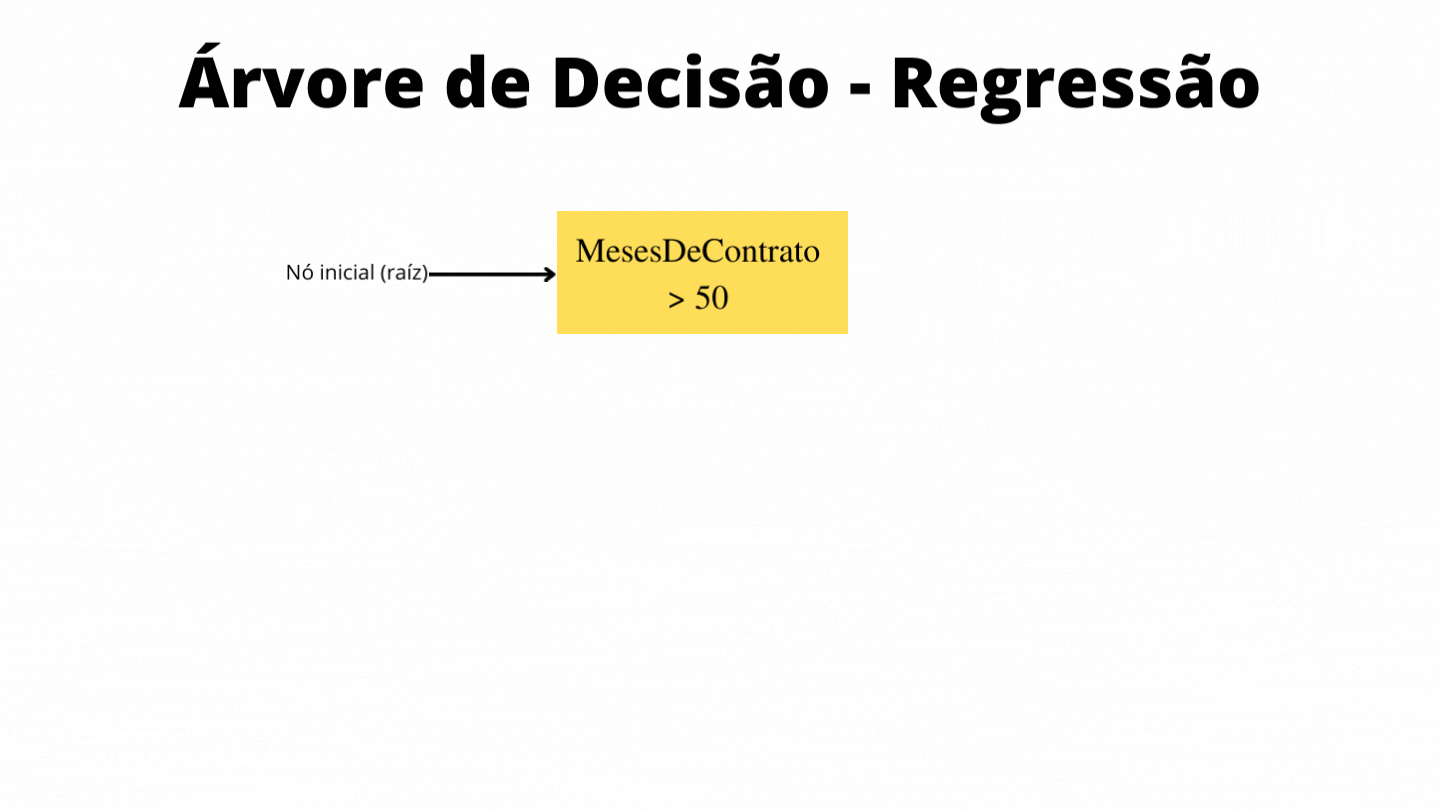

Se você está se sentindo doente, mas não faz ideia do que possa ser e busca ajuda médica, é feita uma série de perguntas (dor de cabeça? febre? tosse?...). Ao final delas é emitido um parecer informando qual a causa dos sintomas. Nessa situação apresentada foi seguido o mesmo princípio utilizado em um estimador chamado árvore de decisão.

Árvore de decisão é um dos modelos de previsão mais simples, inspirado na forma que os seres humanos tomam as decisões e tem uma alta interpretabilidade, ou seja, uma compreensão fácil dos passos que foram realizados para conseguir chegar ao resultado final. Ela pode ser utilizada tanto para modelos de regressão, que têm intuito de prever valores numéricos, quanto para modelos de classificação, que têm intuito de prever categorias.

Graficamente, a árvore de decisão pode ser representada de forma que cada uma das decisões tomadas no processo possam ser visualizadas. Seus elementos principais são os nós, ramos e folhas. A estrutura da árvore se inicia com um nó inicial, também chamado de raiz. A partir dela são traçadas ramificações, que geram novos nós e o processo se repete para os nós subsequentes até que chegue a uma folha, que se trata de um nó especial que tem a informação da resposta, sendo ela uma categoria ou um valor previsto.

Cada ramo representa uma tomada de decisão a partir de um valor ou de uma categoria das variáveis explicativas, dividindo o conjunto de dados em nós que apresentam dados com características cada vez mais similares entre si.

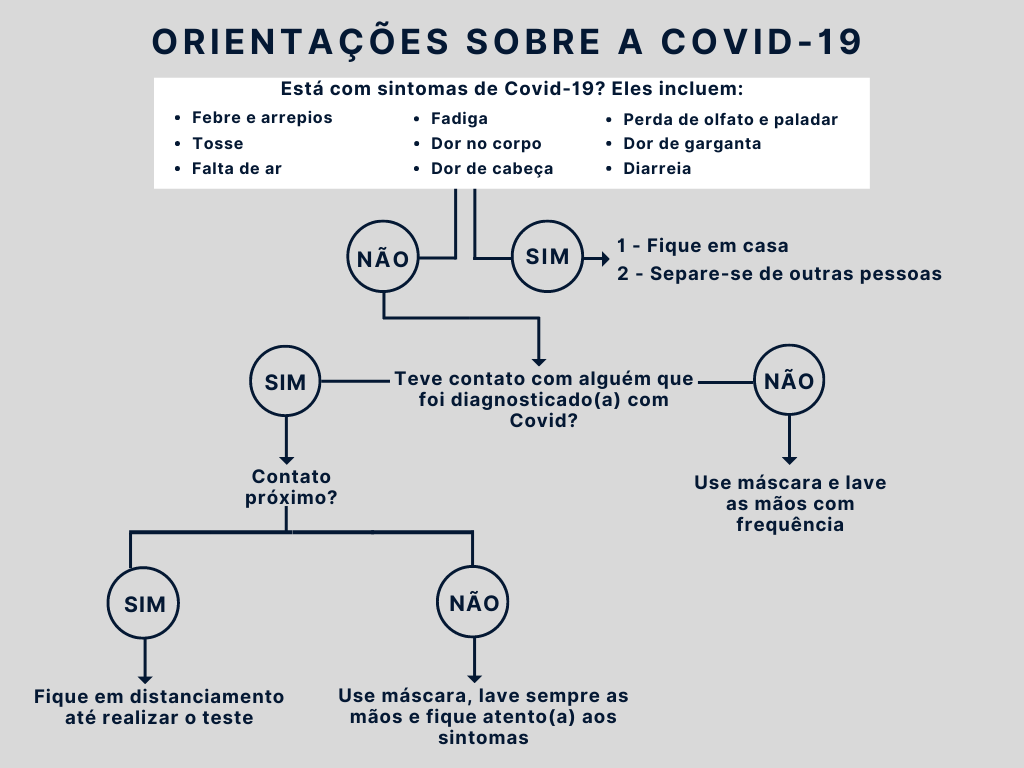

Na imagem acima, temos uma orientação sobre Covid-19 para que as pessoas sejam direcionadas a ficarem isoladas ou não. A raiz ou nó inicial representa a pergunta se a pessoa está com sintomas de Covid-19, como aquelas perguntas realizadas pelo(a) médico(a) indicadas no início desse texto. A pergunta é respondida através dos ramos que partem da raiz, separando as pessoas que possuem sintomas das pessoas que não possuem.

O nó referente às pessoas que possuem sintomas se trata de um nó folha, com a decisão final de isolamento social. O nó referente às pessoas que não possuem sintomas se trata de um nó interno, que passa por um novo questionamento, criando assim novos ramos e nós. O processo se repete até que se chegue em decisões finais.

Portanto, o esquema se trata de uma árvore de decisão, em que é possível detectar todas as escolhas que foram feitas para se chegar às conclusões finais. O algoritmo de computador seguirá esses mesmos princípios, tomando as decisões com base nas variáveis explicativas.

Então o modelo avalia qual feature é provável que dê maior **GANHO DE INFORMAÇÃO** ao ser colocada nas regras para divisão de novos nós.

**Critério de divisão dos nós**



**Índice Gini**

Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo:

$$Gini = 1 - \sum_{i=1}^{k}{P(i)^2}$$

Onde:

* $P(i)$ representa a frequência relativa das classes em cada um dos nós;
* $k$ é o número de classes.

Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.

**Entropia**

A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados e pode ser calculada por meio da seguinte fórmula:

$$Entropia(s) = \sum_{i=1}^{c} - p_i * \log_{2}p_i$$

> *Fórmula: Entropia de S, com S entre parênteses, é igual ao somatório de i iniciando em 1 até c de menos p subscrito i vezes o log 2 de p subscrito i.*

Onde:

* $pi$ representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica $i$;
* `c` é o número de classes.

**3.2 Ajuste e Previsão**


<font size=2>**Documentação:**</font>
<font size=2>[DecisionTreeClassifier](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.DecisionTreeClassifier.html)</font>

In [42]:
# Ajuste do Modelo
from pyspark.ml.classification import DecisionTreeClassifier

dtc = DecisionTreeClassifier(seed=SEED)
modelo_dtc = dtc.fit(treino)

In [43]:
# Predição dos dados de treino
previsoes_dtc_treino = modelo_dtc.transform(treino)
previsoes_dtc_treino.show()

+--------------------+-----+--------------+--------------------+----------+
|            features|label| rawPrediction|         probability|prediction|
+--------------------+-----+--------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    0|    [22.0,3.0]|         [0.88,0.12]|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    1|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,

In [44]:
# Predição dos dados de teste
previsoes_dtc_teste = modelo_dtc.transform(teste)
previsoes_dtc_teste.show()

+--------------------+-----+--------------+--------------------+----------+
|            features|label| rawPrediction|         probability|prediction|
+--------------------+-----+--------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [62.0,128.0]|[0.32631578947368...|       1.0|
|(24,[0,1,2,3,4,5,...|    1| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    1| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [51.0,141.0]| [0.265625,0.734375]|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[331.0,1951.0]|[0.14504820333041...|       1.0|
|(24,[0,1,2,3,4,5,...|    0| [239.0,205.0]|[0.53828828828828...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|  [63.0,118.0]|[0.34806629834254...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[2056.0,334.0]|[0.86025104602510...|       0.0|
|(24,[0,1,2,

### **2.4.2 Métricas**

<font size=2>**Documentação:**</font>
<font size=2>[MulticlassClassificationEvaluator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.MulticlassClassificationEvaluator.html)</font>

A necessidade desse parâmetro é porque estamos utilizando o MulticlassClassificationEvaluator que consegue avaliar modelos que trabalham com varias classes, exemplo: 0, 1, 2 e 3., Então por conta dessa característica algumas métricas são calculadas de forma relativa, por exemplo a precisão que é a divisão entrei o verdadeiros positivos por todos os positivos, no multiclass quais seriam os verdadeiros positivos ? Os que são da classe 1 ou os da classe 2 ? precisamos tomar essa decisão e informar o MulticlassClassificationEvaluator, como no nosso caso só temos as classes 1 e 0, a escolha fica mais simples, mas em casos de várias classes essas métricas vão variar.

In [46]:
import utils
utils.calcula_mostra_metricas

<function utils.calcula_mostra_metricas(modelo_lr, df_transform_modelo, normalize=False, percentage=True)>

In [47]:
# EXEMPLO: Avaliação das predições do treino
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator()
evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: 'accuracy'})

0.7917013599777962

In [48]:
# Diversas Métricas (Treino)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Acurácia: 0.791701
Precisão: 0.805090
Recall: 0.770978
F1: 0.787664


In [49]:
# Exemplo de acurácia para o Teste
evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: 'accuracy'})

0.7714831317632082

In [51]:
# APRESENTAÇÃO DAS MÉTRICAS
import utils

print('Decision Tree Classifier')
print("="*40)

# TREINO
print("Dados de Treino")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
# utils.calcula_mostra_matriz_confusao(previsoes_dtc_treino, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_treino, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))
print("")
print("="*40)

# TESTE
print("Dados de Teste")
print("="*40)
print("Matriz de Confusão")
print("-"*40)
# utils.calcula_mostra_matriz_confusao(previsoes_dtc_teste, normalize=False)
print("-"*40)
print("Métricas")
print("-"*40)
print("Acurácia: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "accuracy"}))
print("Precisão: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}))
print("Recall: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}))
print("F1: %f" % evaluator.evaluate(previsoes_dtc_teste, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}))

Decision Tree Classifier
Dados de Treino
Matriz de Confusão
----------------------------------------
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.791701
Precisão: 0.805090
Recall: 0.770978
F1: 0.787664

Dados de Teste
Matriz de Confusão
----------------------------------------
----------------------------------------
Métricas
----------------------------------------
Acurácia: 0.771483
Precisão: 0.778510
Recall: 0.755598
F1: 0.766883


```python
%%writefile utils_evaluate.py
from pyspark.sql import functions as f # importo a biblioteca functions
from pyspark.ml.evaluation import MulticlassClassificationEvaluator # importo a classe MulticlassClassificationEvaluator

# crio a função que vai receber os dados para serem avaliados

def calcula_mostra_metricas_evaluate(df_transform_modelo, normalize=False, percentage=True):
# os passos para montagem da matriz de confusão são os mesmos da aula
  tp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
  tn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
  fp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
  fn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()

  valorP = 1
  valorN = 1

  if normalize:
    valorP = tp + fn
    valorN = fp + tn

  if percentage and normalize:
    valorP = valorP / 100
    valorN = valorN / 100

  # ‘s’ será minha string de retorno
  # ela vai coletar e montar minha matriz de confusão
  # e também os valores de acurácia, precisão, recall e F1-score
  s = ''

  # construção da minha string da matriz de confusão  
  s += ' '*20 + 'Previsto\n'
  s += ' '*15 +  'Churn' + ' '*5 + 'Não-Churn\n'
  s += ' '*4 + 'Churn' + ' '*6 +  str(int(tp/valorP)) + ' '*7 + str(int(fn/valorP)) + '\n'
  s += 'Real\n'
  s += ' '*4 + 'Não-Churn' + ' '*2 + str(int(fp/valorN)) +  ' '*7 + str(int(tn/valorN))  + '\n'
  s += '\n'

  # adiciono os valores de cada métrica a minha string de retorno com MulticlassClassificationEvaluator
  evaluator = MulticlassClassificationEvaluator()

  s += f'Acurácia: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "accuracy"}):.2f}\n'
  s += f'Precisão: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}):.2f}\n'
  s += f'Recall: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}):.2f}\n'
  s += f'F1: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}):.2f}\n'

  return s
```

In [52]:
%%writefile utils_evaluate.py
from pyspark.sql import functions as f # importo a biblioteca functions
from pyspark.ml.evaluation import MulticlassClassificationEvaluator # importo a classe MulticlassClassificationEvaluator

# crio a função que vai receber os dados para serem avaliados

def calcula_mostra_metricas_evaluate(df_transform_modelo, normalize=False, percentage=True):
# os passos para montagem da matriz de confusão são os mesmos da aula
  tp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
  tn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
  fp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
  fn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()

  valorP = 1
  valorN = 1

  if normalize:
    valorP = tp + fn
    valorN = fp + tn

  if percentage and normalize:
    valorP = valorP / 100
    valorN = valorN / 100

  # ‘s’ será minha string de retorno
  # ela vai coletar e montar minha matriz de confusão
  # e também os valores de acurácia, precisão, recall e F1-score
  s = ''

  # construção da minha string da matriz de confusão  
  s += ' '*20 + 'Previsto\n'
  s += ' '*15 +  'Churn' + ' '*5 + 'Não-Churn\n'
  s += ' '*4 + 'Churn' + ' '*6 +  str(int(tp/valorP)) + ' '*7 + str(int(fn/valorP)) + '\n'
  s += 'Real\n'
  s += ' '*4 + 'Não-Churn' + ' '*2 + str(int(fp/valorN)) +  ' '*7 + str(int(tn/valorN))  + '\n'
  s += '\n'

  # adiciono os valores de cada métrica a minha string de retorno com MulticlassClassificationEvaluator
  evaluator = MulticlassClassificationEvaluator()

  s += f'Acurácia: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "accuracy"}):.2f}\n'
  s += f'Precisão: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1}):.2f}\n'
  s += f'Recall: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1}):.2f}\n'
  s += f'F1: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1}):.2f}\n'

  return s

Writing utils_evaluate.py


In [53]:
import utils_evaluate

print(utils_evaluate.calcula_mostra_metricas_evaluate(previsoes_lr_teste, normalize=False))

                    Previsto
               Churn     Não-Churn
    Churn      1256       307
Real
    Não-Churn  400       1179

Acurácia: 0.77
Precisão: 0.76
Recall: 0.80
F1: 0.78



## **2.5 Random forest**

*Random Forests* (Florestas aleatórias) são conjuntos de árvores de decisão. *Random Forests* combinam muitas árvores de decisão para reduzir o risco de *overfitting*. A implementação `spark.ml` dá suporte a *random forests* para classificação binária ou multiclasse e para regressão, usando *features* contínuas e categóricas.

<font size=2>**Fonte:** [MLlib](https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-classifier)
| [Random Forests](https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forests)</font>

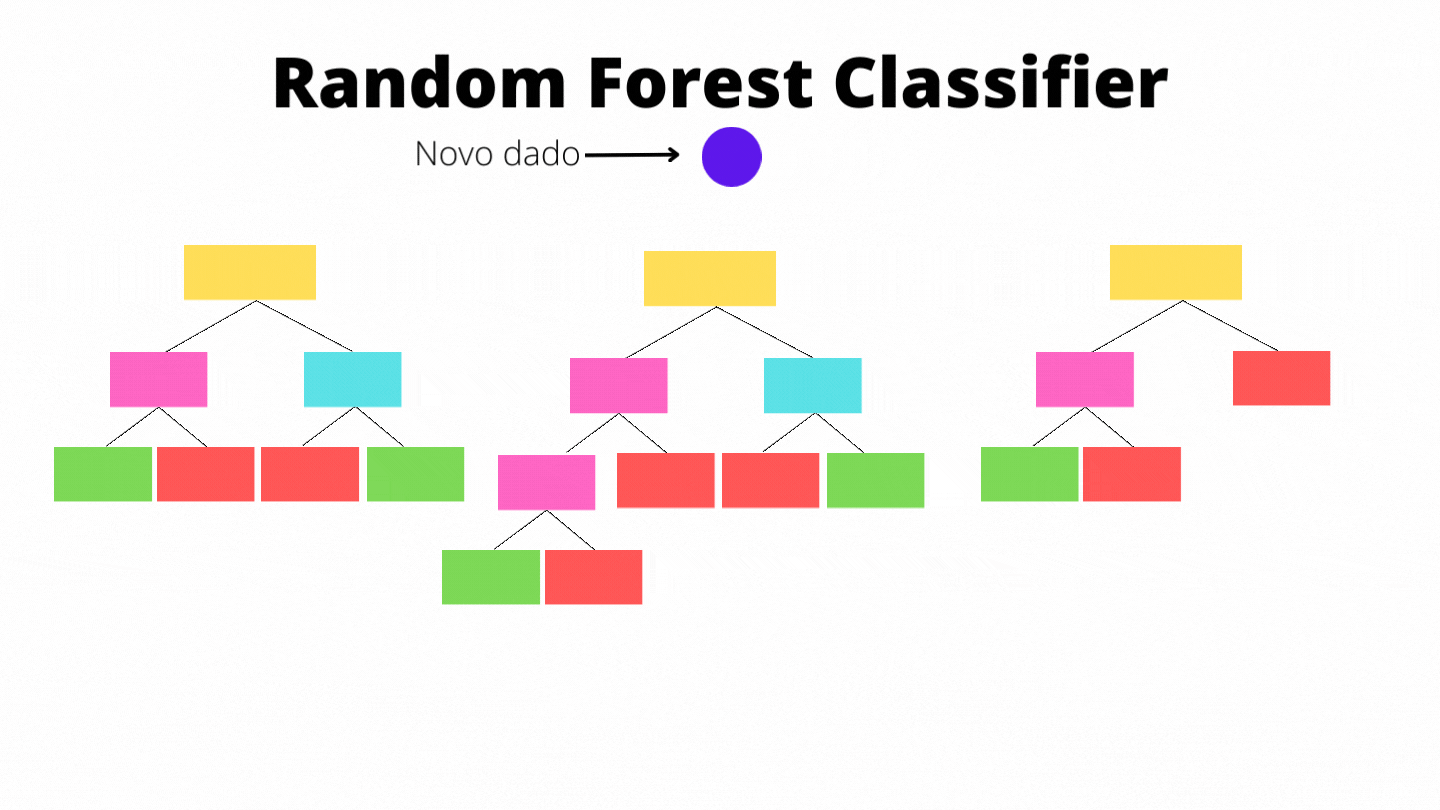

As árvores de decisão possuem uma característica que as impedem de serem consideradas como ferramenta ideal: a imprecisão. Isso quer dizer que elas funcionam muito bem com os dados utilizados para criá-las, mas não tão bem para realizar a classificação de novas amostras. A floresta aleatória (random forest) busca resolver esse problema de overfitting (sobreajuste).

O algoritmo Random Forest se baseia na utilização de diversas árvores de decisão para encontrar o resultado. Como essa árvore pode ser usada para regressão e classificação, o Random Forest também pode ser utilizado para os dois tipos de problemas. Vamos nos concentrar aqui nos problemas de classificação.

Para realizar a previsão, o algoritmo cria diversas árvores de decisão no conjunto de dados e é realizada a predição para cada uma delas. Internamente é feita uma “votação” para analisar qual predição tem maior ocorrência e, então, essa predição torna-se a resposta final. Se fosse utilizada a mesma base de dados na criação de todas as árvores de decisão do Random Forest, as respostas de cada uma das árvores seriam iguais e o resultado da votação seria idêntico a realizar um único modelo de árvore de decisão.

Para evitar esse problema, é utilizada uma técnica chamada bootstrapping. Ela consiste em fazer amostragens com reposição do conjunto de dados original e cada uma delas será usada para uma árvore de decisão diferente. A amostragem com reposição significa que, ao sortearmos um elemento, isso não nos impede que ele mesmo apareça em sorteios futuros.

Dessa forma, as árvores terão resultados distintos, uma vez que são treinadas com conjuntos de dados diferentes. Na amostragem com repetição, as observações da tabela poderão ficar de fora e outras estarão duplicadas.

### **2.5.1 Ajuste**


In [54]:
# Ajuste do Modelo RandomForest
from pyspark.ml.classification import RandomForestClassifier

n_estimatiors = 20
rfc = RandomForestClassifier(seed=SEED, numTrees=n_estimatiors)
modelo_rfc = rfc.fit(treino)

In [55]:
previsoes_rfc_treino = modelo_rfc.transform(treino)
previsoes_rfc_treino.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[15.0052773466704...|[0.75026386733352...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[16.9295040273249...|[0.84647520136624...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[9.13052909106814...|[0.45652645455340...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.13052909106814...|[0.45652645455340...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[8.59288938528764...|[0.42964446926438...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[5.59647122885698...|[0.27982356144284...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.33276328267787...|[0.46663816413389...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[5.21616013157118...|[0.26080800657855...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[5.45640255581361...|[0.27282012779068...|       1.0|
|(24,[0,1,2,3,4,

In [56]:
previsoes_rfc_teste = modelo_rfc.transform(teste)
previsoes_rfc_teste.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(24,[0,1,2,3,4,5,...|    0|[16.7433871675615...|[0.83716935837807...|       0.0|
|(24,[0,1,2,3,4,5,...|    0|[7.27313214599648...|[0.36365660729982...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[7.46885072161585...|[0.37344253608079...|       1.0|
|(24,[0,1,2,3,4,5,...|    1|[9.33276328267787...|[0.46663816413389...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.79829004739264...|[0.38991450236963...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.13263407834549...|[0.35663170391727...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[4.45872635511159...|[0.22293631775557...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[7.84691519125130...|[0.39234575956256...|       1.0|
|(24,[0,1,2,3,4,5,...|    0|[9.94796150783366...|[0.49739807539168...|       1.0|
|(24,[0,1,2,3,4,

### **2.5.2 Métricas**

<font size=2>**Documentação:**</font>
<font size=2>[MulticlassClassificationEvaluator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.MulticlassClassificationEvaluator.html)</font>

In [57]:
import utils_evaluate

print(utils_evaluate.calcula_mostra_metricas_evaluate(previsoes_rfc_teste, normalize=False))

                    Previsto
               Churn     Não-Churn
    Churn      1257       306
Real
    Não-Churn  416       1163

Acurácia: 0.77
Precisão: 0.75
Recall: 0.80
F1: 0.78



#### **Comparação de Modelos**

* Analisar o resultado do Treino
* Analisar o resultado do Teste
* Avaliação de Overfitting

* Analisar os tipos de erros (I e II)
*

Comparar o resultado do modelo com os modelos anteriores;

Para comparar os modelos, devemos refletir quais das métricas exploradas até aqui (acurácia, precisão, recall, F1-score e a matriz de confusão fazem mais sentido serem melhoradas no nosso projeto. Essa análise é muito importante para entender qual das métricas tem mais valor para o problema que queremos resolver.

* Escolher a métrica mais importante para solucionar o problema é importante para saber escolher qual o melhor o modelo a ser desenvolvido.

#### **Função de Validação em Série**

In [58]:
def compara_metricas_modelos(lista_previsoes):

  # ‘s’ será minha string de retorno
  # ela vai coletar e montar minha matriz de confusão
  # e também os valores de acurácia, precisão, recall e F1-score
  s = '\n'

  for modelo, df_transform_modelo in lista_previsoes.items():

    s += '-' * 50 + '\n' #linha de separação
    s += modelo + '\n'

    # os passos para montagem da matriz de confusão são os mesmos da aula
    tp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 1)).count()
    tn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 0)).count()
    fp = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 0) & (f.col('prediction') == 1)).count()
    fn = df_transform_modelo.select('label', 'prediction').where((f.col('label') == 1) & (f.col('prediction') == 0)).count()

    # construção da minha string da matriz de confusão  
    s += ' '*20 + 'Previsto\n'
    s += ' '*15 +  'Churn' + ' '*5 + 'Não-Churn\n'
    s += ' '*4 + 'Churn' + ' '*6 +  str(int(tp)) + ' '*7 + str(int(fn)) + '\n'
    s += 'Real\n'
    s += ' '*4 + 'Não-Churn' + ' '*2 + str(int(fp)) +  ' '*7 + str(int(tn))  + '\n'
    s += '\n'

    # adiciono os valores de cada métrica a minha string de retorno com MulticlassClassificationEvaluator
    evaluator = MulticlassClassificationEvaluator()

    s += f'Acurácia: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "accuracy"})}\n'
    s += f'Precisão: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1})}\n'
    s += f'Recall: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1})}\n'
    s += f'F1: {evaluator.evaluate(df_transform_modelo, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1})}\n'

  return s

In [59]:
print(compara_metricas_modelos({'Logistic Regression': previsoes_lr_teste,
                                'DecisionTreeClassifier': previsoes_dtc_teste,
                                'RandomForestClassifier': previsoes_rfc_teste}))


--------------------------------------------------
Logistic Regression
                    Previsto
               Churn     Não-Churn
    Churn      1256       307
Real
    Não-Churn  400       1179

Acurácia: 0.7749840865690643
Precisão: 0.7584541062801933
Recall: 0.8035828534868842
F1: 0.7803665734700218
--------------------------------------------------
DecisionTreeClassifier
                    Previsto
               Churn     Não-Churn
    Churn      1181       382
Real
    Não-Churn  336       1243

Acurácia: 0.7714831317632082
Precisão: 0.7785102175346078
Recall: 0.7555982085732565
F1: 0.7668831168831168
--------------------------------------------------
RandomForestClassifier
                    Previsto
               Churn     Não-Churn
    Churn      1257       306
Real
    Não-Churn  416       1163

Acurácia: 0.7702100572883513
Precisão: 0.7513448894202033
Recall: 0.8042226487523992
F1: 0.7768850432632881



# <font color=orange><b>Etapa 5 - Técnicas de Otimização</b></font>


* Otimização dos hiperparâmetros
* Validação Cruzada

Uma tarefa importante em modelagens de machine learning é a escolha do melhor modelo através da otimização dos seus hiperparâmetros. Isso também é conhecido como *tuning*. Procedimentos de *tuning* podem ser feitos para estimadores individuais, como em uma árvore de decisão, ou para *pipelines* inteiros que podem incluir vários algoritmos.

<font size=2>**Fonte:** [ML Tuning](https://spark.apache.org/docs/latest/ml-tuning.html)</font>

## **5.1 Tuning do Árvore de Decisão**

<font size=2>**Documentação:**</font>
<font size=2>[CrossValidator](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.CrossValidator.html)</font> |
<font size=2>[ParamGridBuilder](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.tuning.ParamGridBuilder.html)</font>

In [60]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

dtc = DecisionTreeClassifier(seed=SEED)
# Gride de Hiperparâmetros
grid = ParamGridBuilder()\
    .addGrid(dtc.maxDepth, [2,5,10])\
    .addGrid(dtc.maxBins, [10,32,48])\
    .build()

In [61]:
# Validação dos modelos de hiperparâmetros
evaluator = MulticlassClassificationEvaluator()

# Construtor do Tuning
dtc_cv = CrossValidator(
    estimator=dtc,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [62]:
modelo_dtc_cv = dtc_cv.fit(treino)

previsoes_dtc_cv_teste  = modelo_dtc_cv.transform(teste)

In [63]:
print(compara_metricas_modelos({'Decision Trees Tuned': previsoes_dtc_cv_teste}))


--------------------------------------------------
Decision Trees Tuned
                    Previsto
               Churn     Não-Churn
    Churn      1163       400
Real
    Não-Churn  300       1279

Acurácia: 0.7772119669000637
Precisão: 0.7949419002050581
Recall: 0.7440818937939859
F1: 0.7686715135492399



## **5.2 Tuning do Random Forest**


In [64]:
rfc = RandomForestClassifier(seed=SEED)

grid = ParamGridBuilder()\
        .addGrid(rfc.maxDepth, [2, 5, 10])\
        .addGrid(rfc.maxBins, [10, 32, 45])\
        .addGrid(rfc.numTrees, [10, 20, 50])\
        .build()
    
evaluator = MulticlassClassificationEvaluator()

In [65]:
rfc_cv = CrossValidator(
    estimator=rfc,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

In [66]:
modelo_rfc_cv = rfc_cv.fit(treino)

previsoes_rfc_cv_teste = modelo_rfc_cv.transform(teste)

In [67]:
print(compara_metricas_modelos({'Decision Trees Tuned': previsoes_rfc_cv_teste}))


--------------------------------------------------
Decision Trees Tuned
                    Previsto
               Churn     Não-Churn
    Churn      1322       241
Real
    Não-Churn  347       1232

Acurácia: 0.8128580521960534
Precisão: 0.7920910724985021
Recall: 0.8458093410108766
F1: 0.818069306930693



## **5.3 Tuning do Logistic Regression**


* regParam: está associado com a capacidade de generalização do modelo
* elasticNetParam: determina como será calculado o penalty do modelo, L2 ou L1.

In [81]:
# Instância
lr = LogisticRegression()

# Gride
grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.01]) \
    .addGrid(lr.elasticNetParam, [0.0, 1.0])\
    .build()

lr_cv = CrossValidator(
    estimator=lr,
    estimatorParamMaps=grid,
    evaluator=evaluator,
    numFolds=3,
    seed=SEED
)

modelo_lr_cv = lr_cv.fit(treino)
previsoes_lr_cv_teste  = modelo_lr_cv.transform(teste)

print(compara_metricas_modelos({'Decision Trees Tuned': previsoes_lr_cv_teste}))


--------------------------------------------------
Decision Trees Tuned
                    Previsto
               Churn     Não-Churn
    Churn      1271       292
Real
    Não-Churn  408       1171

Acurácia: 0.7772119669000637
Precisão: 0.756998213222156
Recall: 0.8131797824696098
F1: 0.7840838988278841



# <font color=orange><b>Etapa 6 - Comparação de Modelos</b></font>


A etapa de comparação de modelos é uma parte muito importante, pois necessita que o Cientista de Dados saiba mais do só rodar os modelos, mas conhecer o problema e como o modelo está contribuindo com uma solução para o problema.

Para isso, é muito importante conhecer os pontos mais importantes do problema e as métricas de avaliação. Desta forma é possível observar as métricas importantes para servirem de comparação entre os modelos. Além disso, entender os tipos de erros na classificação.

1. Entender a necessidade apresentada
2. Medir como o modelo soluciona o problema
3. Comparar os modelos segundo a métrica selecionada

# <font color=orange><b>Etapa 7 - Modelo Final</b></font>


## **7.1 Melhor modelo**


In [68]:
# Melhor modelo
melhor_modelo_rfc_cv = modelo_rfc_cv.bestModel

In [72]:
# Melhores parâmetros do melhor modelo
print(melhor_modelo_rfc_cv.getMaxDepth())
print(melhor_modelo_rfc_cv.getMaxBins())
print(melhor_modelo_rfc_cv.getNumTrees)

10
45
20


## **7.2 Instância do melhor modelo**

In [79]:
# Instância do melhor modelo
rfc_tunning = RandomForestClassifier(maxBins=45, maxDepth=10, numTrees=20, seed=SEED)

modelo_rfc_tunning = rfc_tunning.fit(dataset_prep)

## **7.3 Aplicação do modelo**

In [73]:
# Analisando as colunas explicativas necessárias
X

['Mais65anos',
 'MesesDeContrato',
 'MesesCobrados',
 'Conjuge',
 'Dependentes',
 'TelefoneFixo',
 'MaisDeUmaLinhaTelefonica',
 'SegurancaOnline',
 'BackupOnline',
 'SeguroDispositivo',
 'SuporteTecnico',
 'TVaCabo',
 'StreamingFilmes',
 'ContaCorreio',
 'Internet_DSL',
 'Internet_FibraOptica',
 'Internet_Nao',
 'TipoContrato_Mensalmente',
 'TipoContrato_UmAno',
 'TipoContrato_DoisAnos',
 'MetodoPagamento_DebitoEmConta',
 'MetodoPagamento_CartaoCredito',
 'MetodoPagamento_BoletoEletronico',
 'MetodoPagamento_Boleto']

In [74]:
# Novo cliente fictício
novo_cliente = [{
    'Mais65anos': 0,
    'MesesDeContrato': 1,
    'MesesCobrados': 45.30540797610398,
    'Conjuge': 0,
    'Dependentes': 0,
    'TelefoneFixo': 0,
    'MaisDeUmaLinhaTelefonica': 0,
    'SegurancaOnline': 0,
    'BackupOnline': 0,
    'SeguroDispositivo': 0,
    'SuporteTecnico': 0,
    'TVaCabo': 1,
    'StreamingFilmes': 1,
    'ContaCorreio': 1,
    'Internet_DSL': 1,
    'Internet_FibraOptica': 0,
    'Internet_Nao': 0,
    'TipoContrato_Mensalmente': 1,
    'TipoContrato_UmAno': 0,
    'TipoContrato_DoisAnos': 0,
    'MetodoPagamento_DebitoEmConta': 0,
    'MetodoPagamento_CartaoCredito': 0,
    'MetodoPagamento_BoletoEletronico': 1,
    'MetodoPagamento_Boleto': 0
}]

In [75]:
# Objeto DataFrameSpark do 'novo cliente'
novo_cliente = spark.createDataFrame(novo_cliente)
novo_cliente.show()

+------------+-------+------------+-----------+------------+--------------------+------------+----------+------------------------+-----------------+---------------+----------------------+--------------------------------+-----------------------------+-----------------------------+---------------+-----------------+---------------+--------------+-------+------------+---------------------+------------------------+------------------+
|BackupOnline|Conjuge|ContaCorreio|Dependentes|Internet_DSL|Internet_FibraOptica|Internet_Nao|Mais65anos|MaisDeUmaLinhaTelefonica|    MesesCobrados|MesesDeContrato|MetodoPagamento_Boleto|MetodoPagamento_BoletoEletronico|MetodoPagamento_CartaoCredito|MetodoPagamento_DebitoEmConta|SegurancaOnline|SeguroDispositivo|StreamingFilmes|SuporteTecnico|TVaCabo|TelefoneFixo|TipoContrato_DoisAnos|TipoContrato_Mensalmente|TipoContrato_UmAno|
+------------+-------+------------+-----------+------------+--------------------+------------+----------+------------------------+----

In [76]:
# Preparação da estrutura dos dados
assembler = VectorAssembler(inputCols=X, outputCol='features')
novo_cliente_prep = assembler.transform(novo_cliente).select('features')
novo_cliente_prep.show(truncate=False)

+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|(24,[1,2,11,12,13,14,17,22],[1.0,45.30540797610398,1.0,1.0,1.0,1.0,1.0,1.0])|
+----------------------------------------------------------------------------+



In [80]:
modelo_rfc_tunning.transform(novo_cliente_prep).show()

+--------------------+--------------------+--------------------+----------+
|            features|       rawPrediction|         probability|prediction|
+--------------------+--------------------+--------------------+----------+
|(24,[1,2,11,12,13...|[2.16984156904747...|[0.10849207845237...|       1.0|
+--------------------+--------------------+--------------------+----------+

